In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [3]:
# matplotlib settings
# reset defaults
mpl.rcdefaults()
# font
mpl.rcParams['font.size'] = 16
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['legend.fontsize'] = 'small'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['pdf.fonttype'] = 3
# plotting
mpl.rcParams['figure.figsize'] = (7.48, 4.0)
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 20

/tmp/ipykernel_152345/1540845000.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


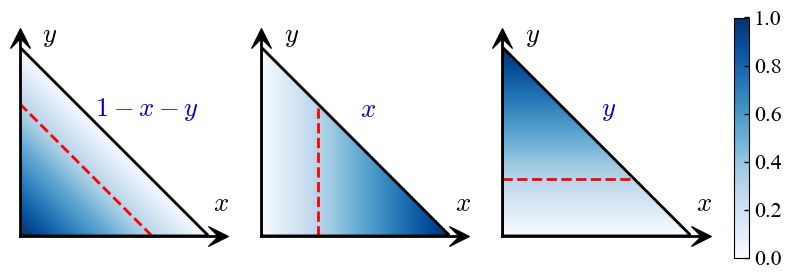

In [76]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

n_grid = 100
x = np.linspace(0, 1, n_grid)
y = np.linspace(0, 1, n_grid)
X, Y = np.meshgrid(x, y)
mask = X + Y <= 1  # Points inside triangle

# Functions peaking at each vertex
def fA(x, y):
    return 1 - x - y
def fB(x, y):
    return x
def fC(x, y):
    return y

fig, axs = plt.subplots(1, 3)
funcs = [fA, fB, fC]

# Custom arrowhead marker paths (from your reference)
xarrow_vertices = [[0.0, 0.0], [-0.08, -0.08], [0.08, 0.0], [-0.08, 0.08], [0.0, 0.0]]
yarrow_vertices = [[0.0, 0.0], [-0.08, -0.08], [0.0, 0.08], [0.08, -0.08], [0.0, 0.0]]
xarrow_path = mpl.path.Path(xarrow_vertices, closed=True)
yarrow_path = mpl.path.Path(yarrow_vertices, closed=True)

# Compute all Z for colorbar limits
Zs = [np.full_like(X, np.nan) for _ in range(3)]
for i, func in enumerate(funcs):
    Zs[i][mask] = func(X[mask], Y[mask])
vmin = min(np.nanmin(Z) for Z in Zs)
vmax = max(np.nanmax(Z) for Z in Zs)
formulas = [r'$1 - x - y$', r'$\quad x$', r'$\quad y$']

# Plot for each vertex using imshow and mask
for ax, Z, formula in zip(axs, Zs, formulas):
    # Set values outside triangle to transparent
    Z_plot = np.copy(Z)
    Z_plot[~mask] = np.nan
    im = ax.imshow(Z_plot, origin='lower', extent=(0,1,0,1), cmap='Blues', vmin=vmin, vmax=vmax)
    ax.set_box_aspect(1)
    ax.set_axis_off()
    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(0.0, 1.0)
    # Draw triangle boundary to hide jagged edges
    ax.plot([0, 1, 0, 0], [0, 0, 1, 0], color='black', lw=2, zorder=12)
    # Draw axes with custom arrowhead markers, extending beyond triangle
    ax.plot([0, 1.05], [0, 0], lw=2, color='black', zorder=10, clip_on=False)
    ax.plot(1.05, 0, color='black', marker=xarrow_path, markersize=14, zorder=11, clip_on=False)
    ax.plot([0, 0], [0, 1.05], lw=2, color='black', zorder=10, clip_on=False)
    ax.plot(0, 1.05, color='black', marker=yarrow_path, markersize=14, zorder=11, clip_on=False)
    # Label axes
    ax.text(1.11, 0.1, '$x$', ha='right', fontsize='large', va='bottom', clip_on=False)
    ax.text(0.12, 1.13, '$y$', ha='left', fontsize='large', va='top', clip_on=False)
    # Formula annotation in upper right
    ax.text(0.4, 0.6, formula, fontsize='large', color='mediumblue',
            ha='left', va='bottom', clip_on=False)

axs[0].plot([0, 0.7], [0.7, 0], color='red', lw=2, ls='--')
axs[1].plot([0.3, 0.3], [0.0, 0.7], color='red', lw=2, ls='--')
axs[2].plot([0, 0.7], [0.3, 0.3], color='red', lw=2, ls='--')

cbar_ax = fig.add_axes([1.0, 0.21, 0.02, 0.6])  # [left, bottom, width, height] in figure fraction
fig.colorbar(im, cax=cbar_ax, orientation='vertical')

fig.tight_layout()
fig.savefig('triangular_element.pdf', bbox_inches='tight')
plt.show()